# Описание сути проекта и данных

Этот набор данных содержит финансовую информацию и кредитную историю некоторых лиц. Мы собираемся выполнить анализ данных, чтобы получить некоторое представление об этих данных.

Некоторые другие важные сведения, которые у нас есть об этих лицах, включают пол, семейное положение, образование, количество иждивенцев, доход, сумму кредита, кредитную историю и другие. Детализируем это ниже.

- ID: уникальный идентификатор записи
- Customer_ID: уникальный идентификатор клиента
- Name: имя
- Month: месяц
- Age: возраст
- SSN: номер социального страхования
- Occupation: род занятий
- Annual_Income: годовой доход
- Monthly_Base_Salary: заработок за месяц
- Monthly_Inhand_Salary: месячный базовый оклад
- Num_Bank_Accounts: количество банковских аккаунтов клиента
- Num_Credit_Card: общее количество кредитных карт
- Interest_Rate: рейтинг интереса к кредитным картам
- Num_of_Loan: количество кредитов, взятых в банке
- Type_of_Loan: виды кредитов, взятых в банке
- Delay_from_due_date: среднее количество дней задержки с даты платежа
- Num_of_delayed_Payment: среднее количество платежей, задержанных человеком
- Changed_Credit_Limit: процентное изменение лимита кредитной карты
- Num_Credit_Inquiries: количество запросов кредитной карты
- Credit_Mix: классификация кредитов в общем
- Outstanding_Debt: задолженность, подлежащая оплате
- Credit_Utilization_Ratio: коэффициент использования кредитной карты
- Credit_History_Age: возраст кредитной истории человека
- Payment_of_Min_Amount: была ли уплачена только минимальная сумма лицом
- Total_EMI_per_month: ежемесячные платежи
- Amount_invested_monthly: ежемесячную сумму, инвестированную клиентом
- Payment_Behaviour: платежное поведение клиента
- Monthly_Balance: ежемесячная сумма баланса клиента
- Credit_Score: статус кредитного скоринга (Poor, Standard, Good)

Все выплаты, суммы и т.д. представлены в USD($)

## Импортируем библиотеки для визуализации данных:

In [1]:
# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Опции пакетов
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

## Считывание данных и их визуализация

In [2]:
df = pd.read_csv("data.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

Имеем, что в таблице 100000 строк, 28 столбцов

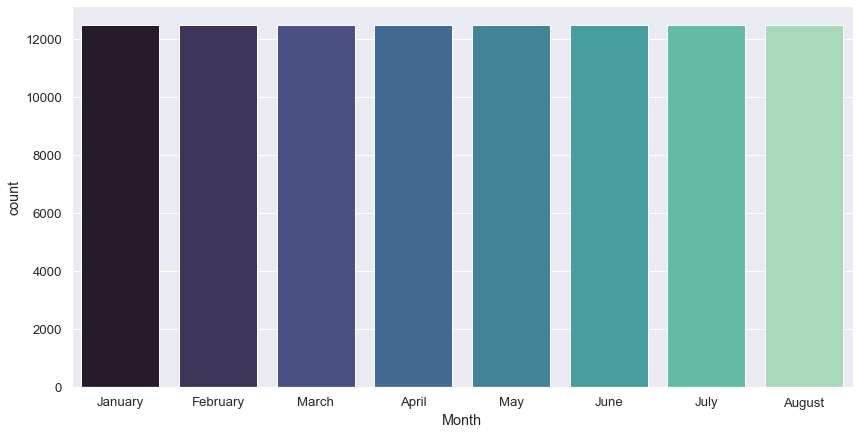

In [4]:
sns.countplot(df['Month'],palette="mako");

видим равномерное распределение по месяцам

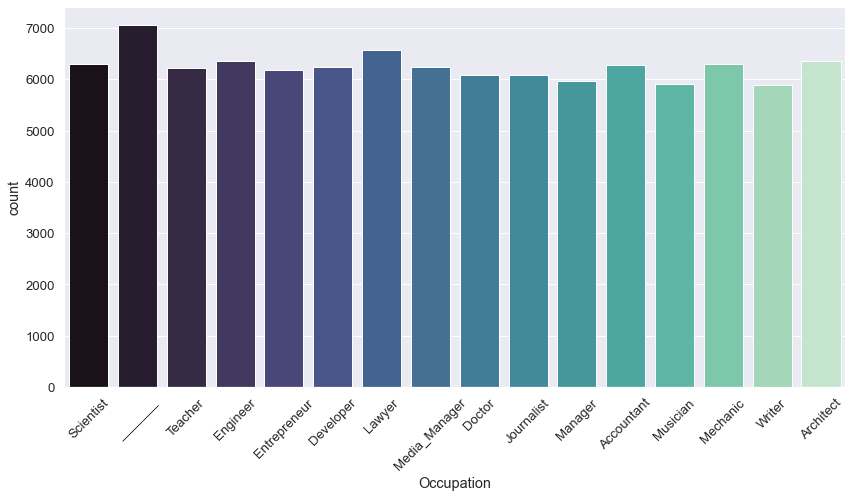

In [5]:
sns.countplot(df['Occupation'],palette="mako");
plt.xticks(rotation=45);

Из данных видим распределение по профессиям. Распределение достаточно равномерное. Помимо этого относительно много пустых данных.

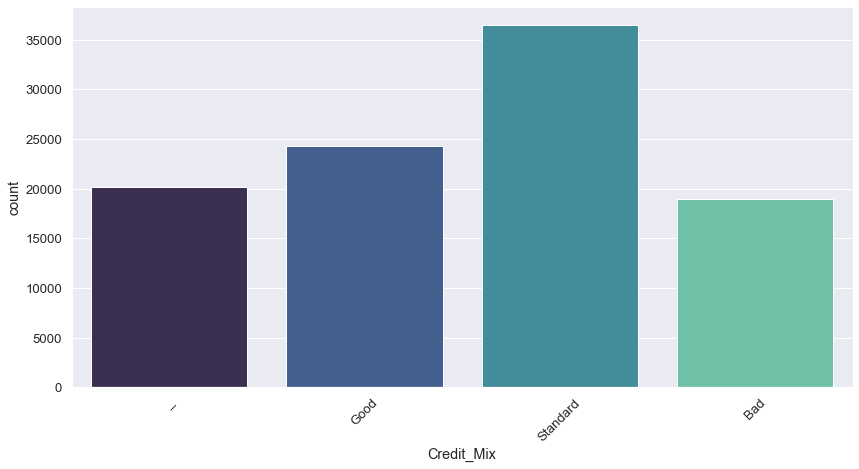

In [6]:
sns.countplot(df['Credit_Mix'],palette="mako");
plt.xticks(rotation=45);

Из данных по кредитному статусу видим, что бОльшая часть пользователей имеет стандартный статус, также есть порядка 30% пустых значений.

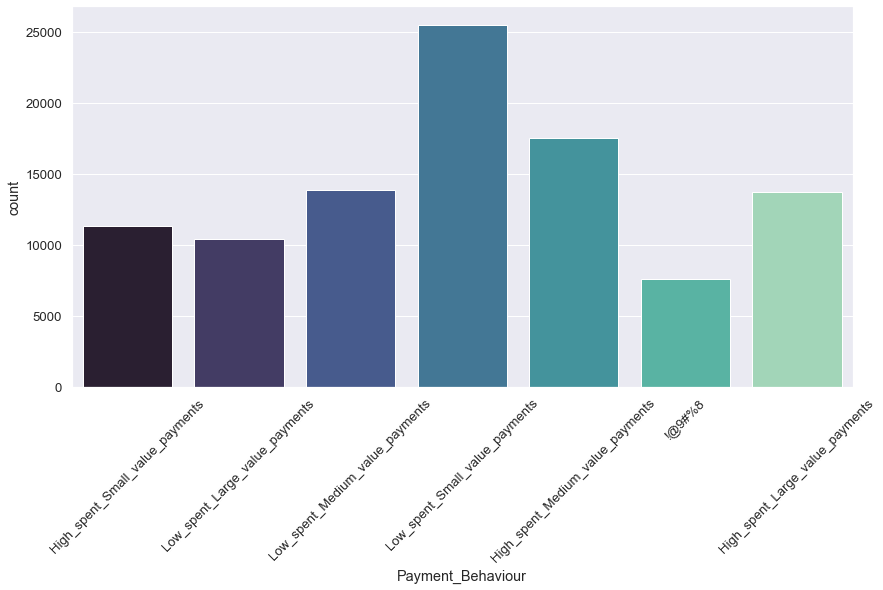

In [7]:
sns.countplot(df['Payment_Behaviour'],palette="mako");
plt.xticks(rotation=45);

Из графиков поведения видно, что бОльшая часть людей находится в статусе "меньше тратит меньшими суммами".

## Отрисуем ключевой показатель

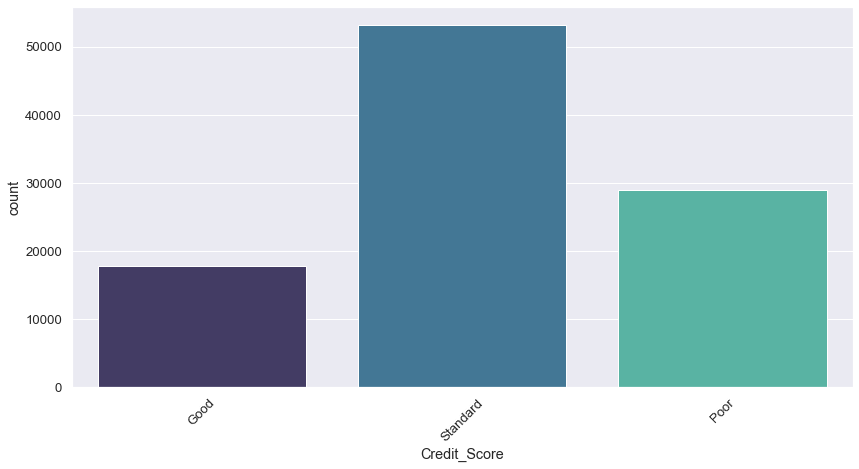

In [8]:
sns.countplot(df['Credit_Score'],palette="mako");
plt.xticks(rotation=45);

Видим, что ключевой показатель (статус возврата кредита смещен в сторону стандартного, но большая часть имеет статут Poor (бедный))

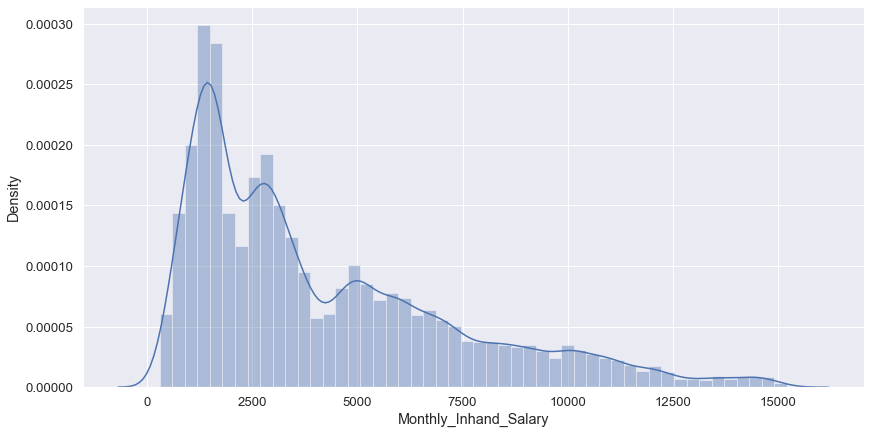

In [9]:
sns.distplot(df['Monthly_Inhand_Salary']);

Видим достаточно стандартный случай распределения зарплат клиентов, которое смещено к 0. Большая часть клиентов имеет месячный доход до 2500$.

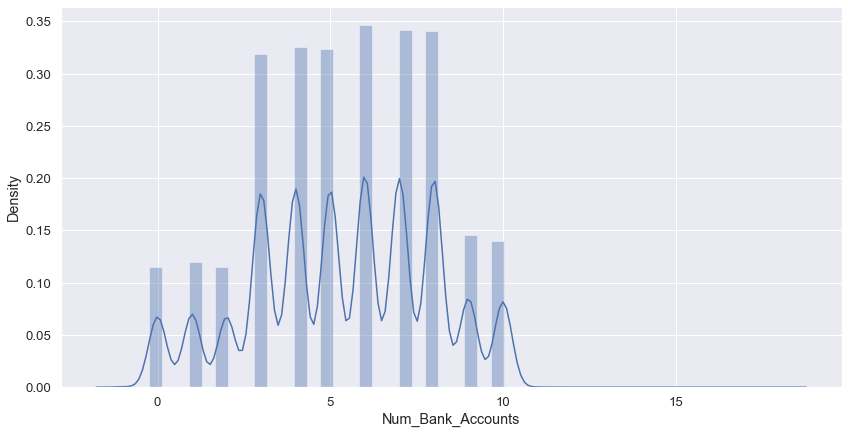

In [10]:
sns.distplot(df['Num_Bank_Accounts'][df['Num_Bank_Accounts'] < 20]);

БОльшая часть людей имеет порядка от 5 до 8 банковских аккаунтов. Случаи, где кол-во банковских аккаунтов больше 20 убираем (это выбросы)

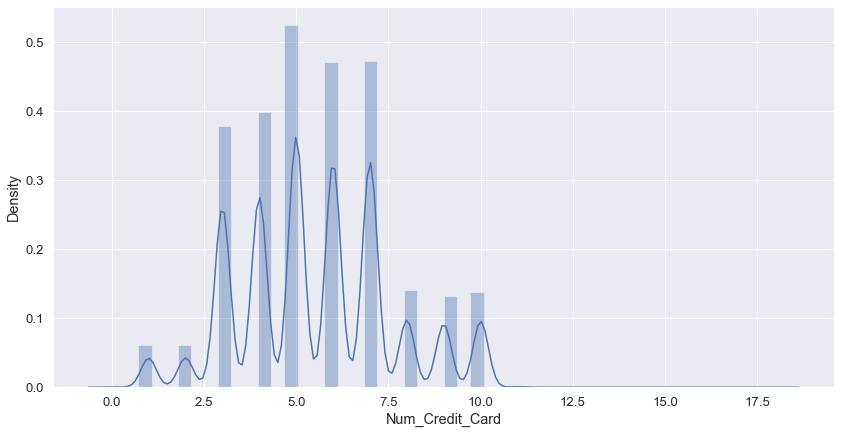

In [11]:
sns.distplot(df['Num_Credit_Card'][df['Num_Credit_Card'] < 20]);

БОльшая часть людей имеет порядка от 5 до 7 кредитных карт. Случаи, где кол-во больше 20 убираем (это выбросы)

Дальнейшую доп. визуализацию сделаем после обрабтки данных.

## Выявление проблем с данными и их чистка:

- ID, Name и SSN бесполезны
- Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance числовое, но отображается как категория (необходимо исправить)
- Данные содержат выбросы
- Num_Credit_Card имеет нули
- Type_of_Loan нужно переписать в 8 колонок
- Num_Bank_Accounts содержит отрицательные значения
- Много пропущенных данных

In [12]:
# Удаляем ненужные колонки
del df['ID'] 
del df['Name'] 
del df['SSN'] 
del df['Payment_Behaviour']

In [13]:
# исправляем тип данных
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']
def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.nan
for col in N_to_fix :
    df[col] = df[col].apply(fix_nums)

In [14]:
# Type_of_Loan
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] : 
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

In [15]:
# Num_Bank_Accounts
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

In [16]:
# Num_Credit_Card
df['Num_Credit_Card'].replace(0,1,inplace=True)

In [17]:
# Credit_History_Age
def History_age(age):
    try : 
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

In [18]:
# Payment_of_Min_Amount
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [19]:
# Тип деятельности 
occs = df['Occupation'].value_counts().index[1:]
id_ = "CUS_0xb891"
oc = df[df['Customer_ID'] == id_]['Occupation'].mode()[0]
df[df['Customer_ID'] == id_].replace("_______",oc)
for ID in df[df['Occupation'] == "_______"]['Customer_ID'] : 
    oc = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)
df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])
df['Occupation'].value_counts()

Lawyer           7101
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6715
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

Видно, что все пустые значения убрали

In [20]:
# Credit_Mix
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}
df['Credit_Mix'] = df['Credit_Mix'].map(m)

In [21]:
# Дополнительная предобработка
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [22]:
IDs = 1 
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1 

In [23]:
from datasist.structdata import detect_outliers

In [24]:
# Обработка выбросов
Numericals = df.select_dtypes(exclude='object').columns[1:]
for col in Numericals :
    outliers_indecies = detect_outliers(df,0,[col])
    median = df[col].median()
    df[col].iloc[outliers_indecies] = median

In [25]:
# Последующая обработка категориальных параметров
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}
df['Credit_Score'] = df['Credit_Score'].map(m)
del df['Customer_ID']
df = pd.get_dummies(df,drop_first=True)

In [26]:
# Удаляем финально оставшиеся пустые строки
df = df.fillna(0)

# Построение доп. графиков

построим дополнительно график по возрасту, чтобы продемонстрировать, что предобработка произведена успешно

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x7fd788716430>


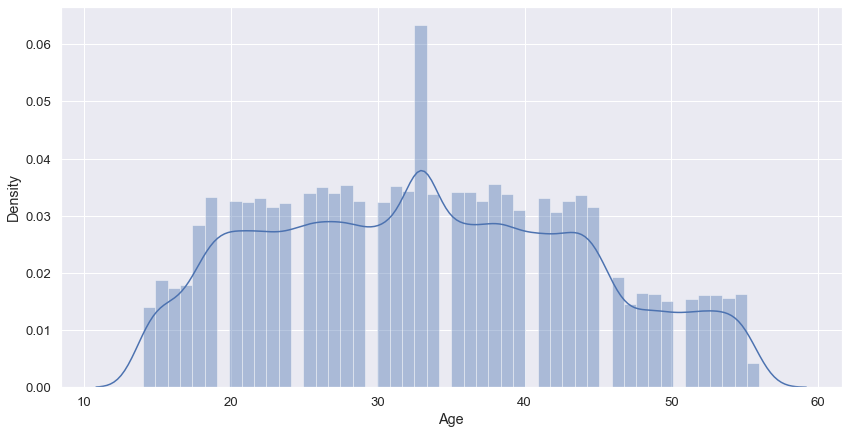

In [27]:
sns.distplot(df['Age']);

Видим, что достаточно много клиентов имеют возраст в районе 20 лет, также большая часть клиентов находится в возрастной группе от 30 до 40. Возрастных клиентов на порядок меньше.

# Разбиение данных

In [28]:
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

In [30]:
from sklearn.preprocessing import PowerTransformer

In [31]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Построение модели

### Важно:
Для построения модели будем использовать несколько алгоритмов: бэггинг, деревья решений, случайный лес, градиентный бустинг и XGboost. В качестве финального оценщика будем использовать логистическую регрессию.

In [32]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

In [33]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [34]:
# обучение модели
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   n_jobs=-1)

In [35]:
#Определяем качество прогноза на выборке, на которой тренировались
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9998746249944029


In [36]:
#Определяем качество прогноза на тестовой выборке
print("Test Score: ",model.score(X_test, y_test))

Test Score:  0.8478174561715109


In [37]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     15613
           1       0.80      0.80      0.80     15973
           2       0.90      0.88      0.89     16271

    accuracy                           0.85     47857
   macro avg       0.85      0.85      0.85     47857
weighted avg       0.85      0.85      0.85     47857



Получаем, что алгоритм имеет точность более 84%, то есть из 100 человек для 84 он правильно дает прогноз.